**Name:** Anugrah Kulkarni |
**Branch:** Computer Engineering |
**Roll No:** 25 |
**PRN** - 22UF17555CM154 |
**DIV** - BTech 9/22

**AI & ML Experiment 6 : Parkinson's Disease Detection**

# **Colab Link** - https://colab.research.google.com/drive/1jPOQJIKiCRKBI6AWPevwzVRTPNjDOxL1?usp=sharing

Data - https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
import pandas as pd
import io

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/Parkinsson disease.csv')

# Reading dataset
print("Dataset Loaded Successfully!")
print("First few rows of the dataset:")
print(df.head())  # Display the first few rows of the dataset

# Optional: Check the shape and info of the dataset
print("\nDataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())

Dataset Loaded Successfully!
First few rows of the dataset:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR   

In [5]:
df.shape

(195, 24)

In [6]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
df['status']

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


**Visualization**

[]

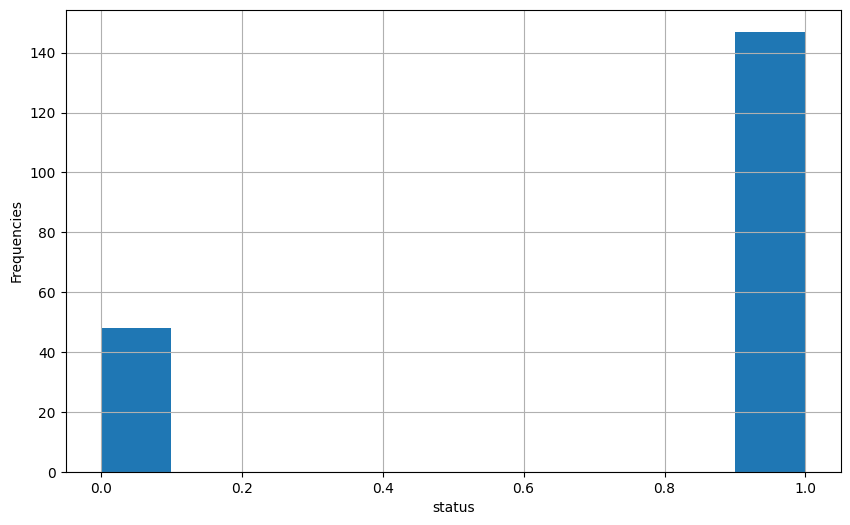

In [11]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()

<Axes: xlabel='status', ylabel='NHR'>

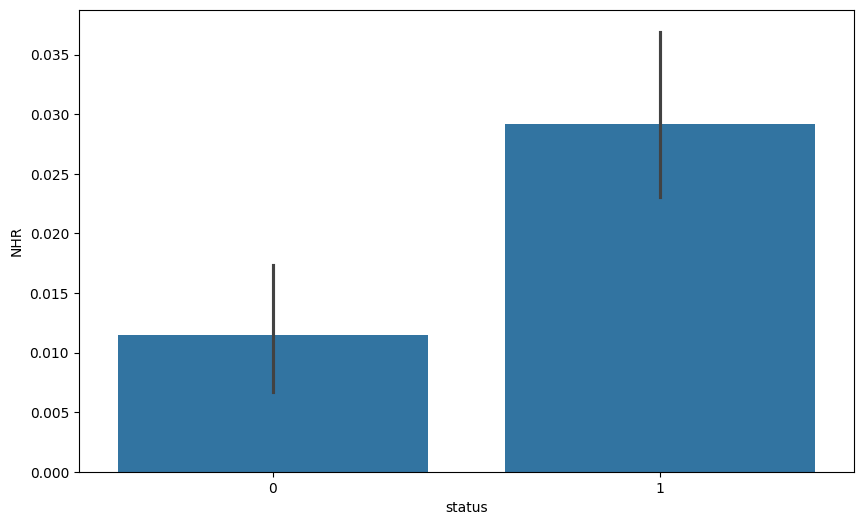

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='NHR', data=df)

<Axes: xlabel='status', ylabel='HNR'>

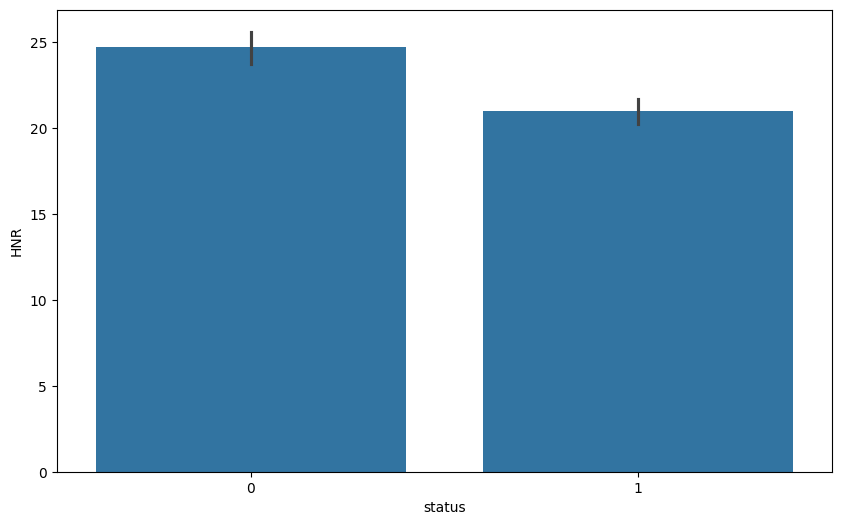

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='HNR', data=df)

<Axes: xlabel='status', ylabel='RPDE'>

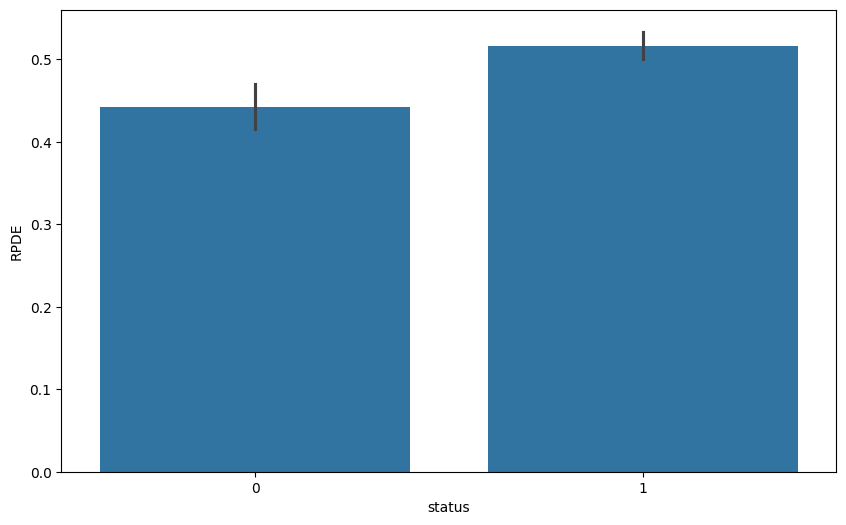

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='RPDE', data=df)

**Distribution Plot**

/tmp/ipython-input-3090128702.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax=ax[i][j])
/tmp/ipython-input-3090128702.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax=ax[i][j])
/tmp/ipython-input-3090128702.py:8: UserWarning: 

`distplot` is a depreca

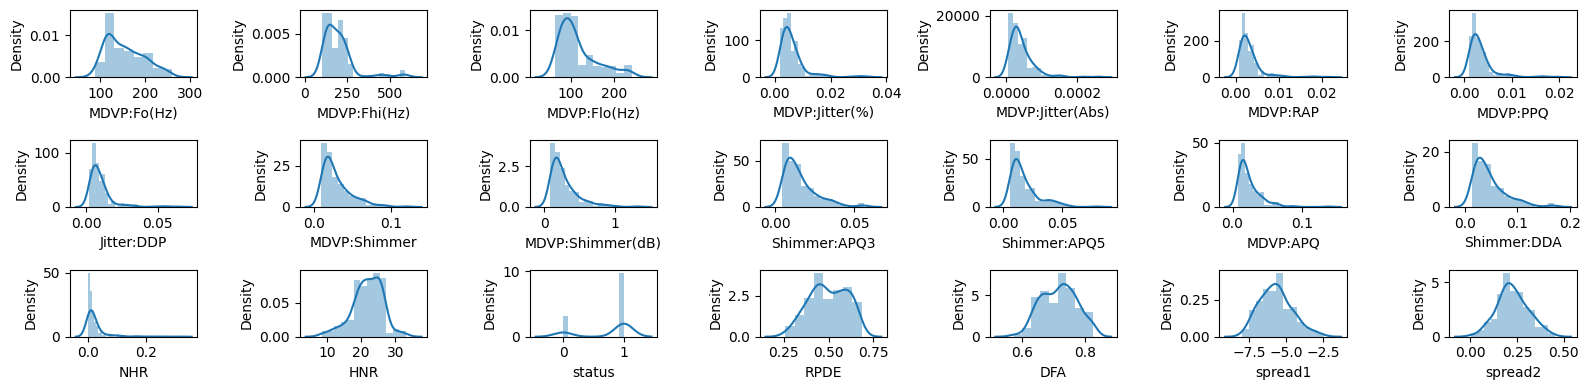

In [15]:
rows = 3
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4))
col = df.columns
index = 1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index = index + 1

plt.tight_layout()

In [16]:
df.drop(['name'], axis=1, inplace=True)

In [17]:
X = df.drop(labels=['status'], axis=1)
Y = df['status']
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [19]:
Y.head()

,status
0,1
1,1
2,1
3,1
4,1


**Splitting the data**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(156, 22) (39, 22) (156,) (39,)


**Machine Learning**

**Logistic Regression**

In [21]:
log_reg = LogisticRegression().fit(X_train, Y_train)

# predict on train
train_preds = log_reg.predict(X_train)
# accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

# predict on test
test_preds = log_reg.predict(X_test)
# accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

# Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))


Model accuracy on train is:  0.8782051282051282
Model accuracy on test is:  0.8717948717948718
--------------------------------------------------
confusion_matrix train is:  [[ 25  15]
 [  4 112]]
confusion_matrix test is:  [[ 5  3]
 [ 2 29]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [22]:
RF = RandomForestClassifier().fit(X_train, Y_train)

# predict on train
train_preds2 = RF.predict(X_train)
# accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

# predict on test
test_preds2 = RF.predict(X_test)
# accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

# Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))


Model accuracy on train is:  1.0
Model accuracy on test is:  0.9230769230769231
--------------------------------------------------
confusion_matrix train is:  [[ 40   0]
 [  0 116]]
confusion_matrix test is:  [[ 6  2]
 [ 1 30]]


In [23]:
print((Y_test != test_preds2).sum(), '/', ((Y_test == test_preds2).sum() + (Y_test != test_preds2).sum()))

3 / 39


In [24]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test, test_preds2))

KappaScore is:  0.7526427061310782


In [25]:
test_preds2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
test_preds2, Y_test

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 96     1
 5      1
 116    1
 35     0
 178    1
 185    0
 54     1
 134    1
 90     1
 187    0
 139    1
 142    1
 175    0
 26     1
 89     1
 140    1
 155    1
 23     1
 132    1
 37     1
 151    1
 28     1
 85     1
 93     1
 172    0
 75     1
 18     1
 105    1
 121    1
 130    1
 33     0
 46     0
 166    0
 163    1
 11     1
 164    1
 81     1
 111    1
 67     1
 Name: status, dtype: int64)

In [27]:
ddf=pd.DataFrame(data=[test_preds2,Y_test])

In [28]:
ddf.T

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


**Applying other Machine Learning model to see if there is improvement in accuracy**

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, cohen_kappa_score
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

**Decision Tree Classifier**

Predictions and Accuracy

In [31]:
DT = DecisionTreeClassifier().fit(X_train, Y_train)
# Predict on train data
train_preds3 = DT.predict(X_train)
print("Model accuracy on train is:", accuracy_score(Y_train, train_preds3))

# Predict on test data
test_preds3 = DT.predict(X_test)
print("Model accuracy on test is:", accuracy_score(Y_test, test_preds3))

Model accuracy on train is: 1.0
Model accuracy on test is: 0.9487179487179487


Confusion Matrix and Kappa Score

In [32]:
print("Confusion matrix train:", confusion_matrix(Y_train, train_preds3))
print("Confusion matrix test:", confusion_matrix(Y_test, test_preds3))

# Wrong predictions
print("Wrong predictions:", (Y_test != test_preds3).sum(), '/', ((Y_test == test_preds3).sum() + (Y_test != test_preds3).sum()))

# Kappa Score
print("Kappa Score:", cohen_kappa_score(Y_test, test_preds3))

Confusion matrix train: [[ 40   0]
 [  0 116]]
Confusion matrix test: [[ 8  0]
 [ 2 29]]
Wrong predictions: 2 / 39
Kappa Score: 0.8560885608856088


**Naive Bayes Classifier**

Predictions and Accuracy

In [33]:
NB = GaussianNB().fit(X_train, Y_train)
# Predict on train data
train_preds4 = NB.predict(X_train)
print("Model accuracy on train is:", accuracy_score(Y_train, train_preds4))

# Predict on test data
test_preds4 = NB.predict(X_test)
print("Model accuracy on test is:", accuracy_score(Y_test, test_preds4))

Model accuracy on train is: 0.7307692307692307
Model accuracy on test is: 0.6923076923076923


Confusion Matrix and Kappa Score

In [34]:
print("Confusion matrix train:", confusion_matrix(Y_train, train_preds4))
print("Confusion matrix test:", confusion_matrix(Y_test, test_preds4))

# Wrong predictions
print("Wrong predictions:", (Y_test != test_preds4).sum(), '/', ((Y_test == test_preds4).sum() + (Y_test != test_preds4).sum()))

# Kappa Score
print("Kappa Score:", cohen_kappa_score(Y_test, test_preds4))

Confusion matrix train: [[38  2]
 [40 76]]
Confusion matrix test: [[ 8  0]
 [12 19]]
Wrong predictions: 12 / 39
Kappa Score: 0.3937823834196892


**K-Nearest Neighbors Classifier**

Predictions and Accuracy

In [35]:
KNN = KNeighborsClassifier().fit(X_train, Y_train)
# Predict on train data
train_preds5 = KNN.predict(X_train)
print("Model accuracy on train is:", accuracy_score(Y_train, train_preds5))

# Predict on test data
test_preds5 = KNN.predict(X_test)
print("Model accuracy on test is:", accuracy_score(Y_test, test_preds5))

Model accuracy on train is: 0.9102564102564102
Model accuracy on test is: 0.8461538461538461


Confusion Matrix and Kappa Score

In [36]:
print("Confusion matrix train:", confusion_matrix(Y_train, train_preds5))
print("Confusion matrix test:", confusion_matrix(Y_test, test_preds5))

# Wrong predictions
print("Wrong predictions:", (Y_test != test_preds5).sum(), '/', ((Y_test == test_preds5).sum() + (Y_test != test_preds5).sum()))

# Kappa Score
print("Kappa Score:", cohen_kappa_score(Y_test, test_preds5))

Confusion matrix train: [[ 30  10]
 [  4 112]]
Confusion matrix test: [[ 4  4]
 [ 2 29]]
Wrong predictions: 6 / 39
Kappa Score: 0.48


**Support Vector Machine (SVM)**

Predictions and Accuracy

In [37]:
SVM = SVC(kernel='linear').fit(X_train, Y_train)
# Predict on train data
train_preds6 = SVM.predict(X_train)
print("Model accuracy on train is:", accuracy_score(Y_train, train_preds6))

# Predict on test data
test_preds6 = SVM.predict(X_test)
print("Model accuracy on test is:", accuracy_score(Y_test, test_preds6))

Model accuracy on train is: 0.8782051282051282
Model accuracy on test is: 0.8974358974358975


Confusion Matrix and Kappa Score

In [38]:
print("Confusion matrix train:", confusion_matrix(Y_train, train_preds6))
print("Confusion matrix test:", confusion_matrix(Y_test, test_preds6))

# Recall Score
print("Recall score:", recall_score(Y_test, test_preds6))

# Wrong predictions
print("Wrong predictions:", (Y_test != test_preds6).sum(), '/', ((Y_test == test_preds6).sum() + (Y_test != test_preds6).sum()))

# Kappa Score
print("Kappa Score:", cohen_kappa_score(Y_test, test_preds6))

Confusion matrix train: [[ 23  17]
 [  2 114]]
Confusion matrix test: [[ 5  3]
 [ 1 30]]
Recall score: 0.967741935483871
Wrong predictions: 4 / 39
Kappa Score: 0.6533333333333333
